Now we have explored the relationsips between cpx chemistry and pressure, as well as the effect of melt chemistry and temperature we can start to fit statistical relationships between the parameters.

We will do this by fitting a linear regression between one chemical element in the cpx and pressure of the experiment. A linear regression is where we fit a dependent variable (y-variable) as a function of an indepedent variable (x-variable).

Y = β<sub>1</sub> + β<sub>2</sub>X + ϵ

We can create an example below, using values for β<sub>1</sub>=10 and β<sub>2</sub>=3, and plotting the density for the x and v variables.

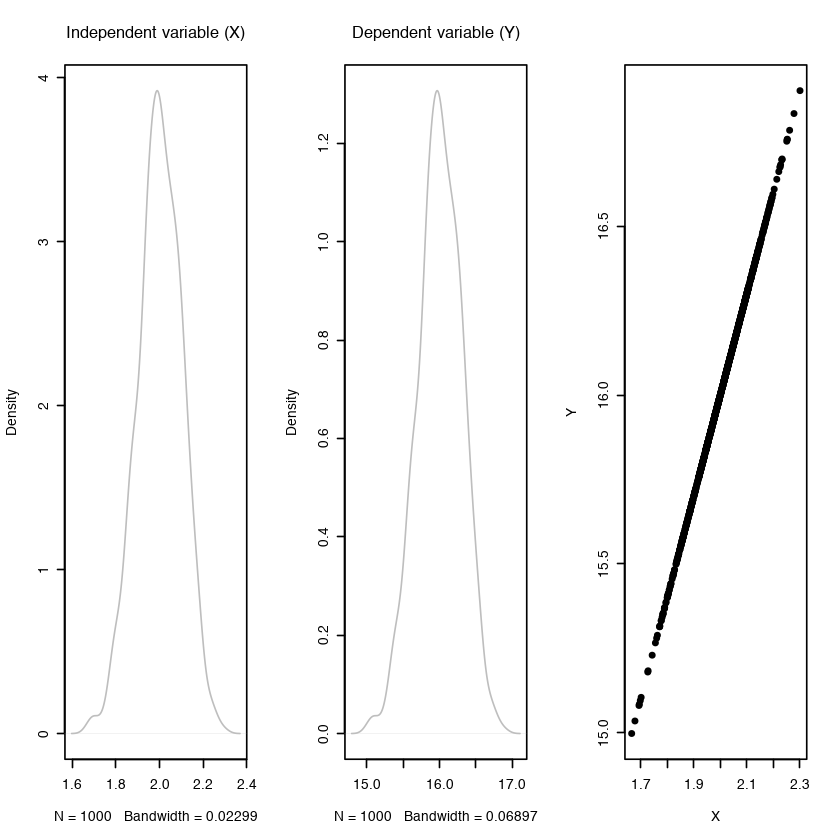

In [1]:
n <- 1000
B1 <- 10
B2 <- 3
X <- rnorm(n,2,0.1)

Y = B1 + (B2*X) 

par(mfrow=c(1,3))
plot(density(X),col="grey", main="Independent variable (X)")
plot(density(Y),col="grey", main="Dependent variable (Y)")
plot(X,Y,pch=16,col="black")

Using the values of Y and X we can fit a linear regression between two parameters, and estimate the values of β<sub>1</sub> and β<sub>2</sub>.

In [2]:
example <- data.frame(Y,X)

linearMod <- lm(Y ~ X, data=example)
print(linearMod)


Call:
lm(formula = Y ~ X, data = example)

Coefficients:
(Intercept)            X  
         10            3  



We can see that the model correct predicts the values of the intercept (β<sub>1</sub>) and the slope (β<sub>2</sub>).

We can now complicate things below by adding an error term (e).

Try changing the standard deviation of the error term (e) to see how well the linear regression can fit the data.

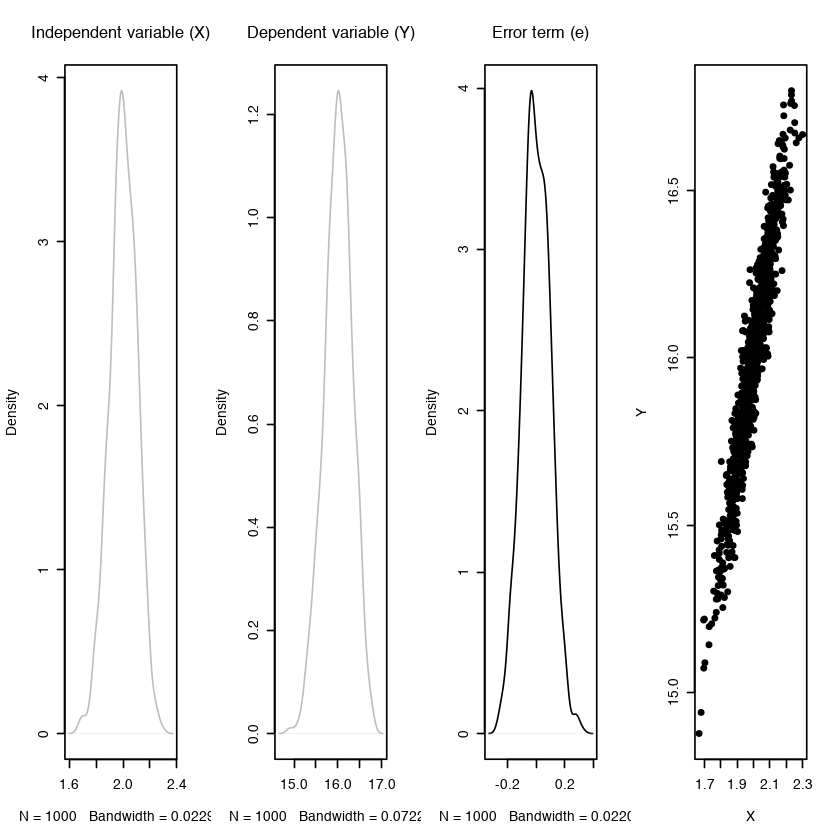

In [3]:
n <- 1000
e <- rnorm(n,0,0.1)
Y = B1 + (B2*X) + e

par(mfrow=c(1,4))
plot(density(X),col="grey", main="Independent variable (X)")
plot(density(Y),col="grey", main="Dependent variable (Y)")
plot(density(e),main="Error term (e)")
plot(X,Y,pch=16,col="black")


In [4]:
example <- data.frame(Y,X)

linearMod <- lm(Y ~ X, data=example)
print(linearMod)

summary(linearMod)


Call:
lm(formula = Y ~ X, data = example)

Coefficients:
(Intercept)            X  
     10.020        2.991  




Call:
lm(formula = Y ~ X, data = example)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26170 -0.06514 -0.00201  0.06857  0.32728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.01954    0.06074  164.95   <2e-16 ***
X            2.99065    0.03033   98.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09752 on 998 degrees of freedom
Multiple R-squared:  0.9069,	Adjusted R-squared:  0.9068 
F-statistic:  9725 on 1 and 998 DF,  p-value: < 2.2e-16


Some variables may not be linearly related to each other. In the example below we simulate the following equation and fit a model.

Y = β<sub>1</sub> + β<sub>2</sub>X<sup>2</sup> + ϵ

You can see in the scatter plot that the relationship between the two variables is not linear. You can change the value of the exponent to explore the relationship between the two variables.

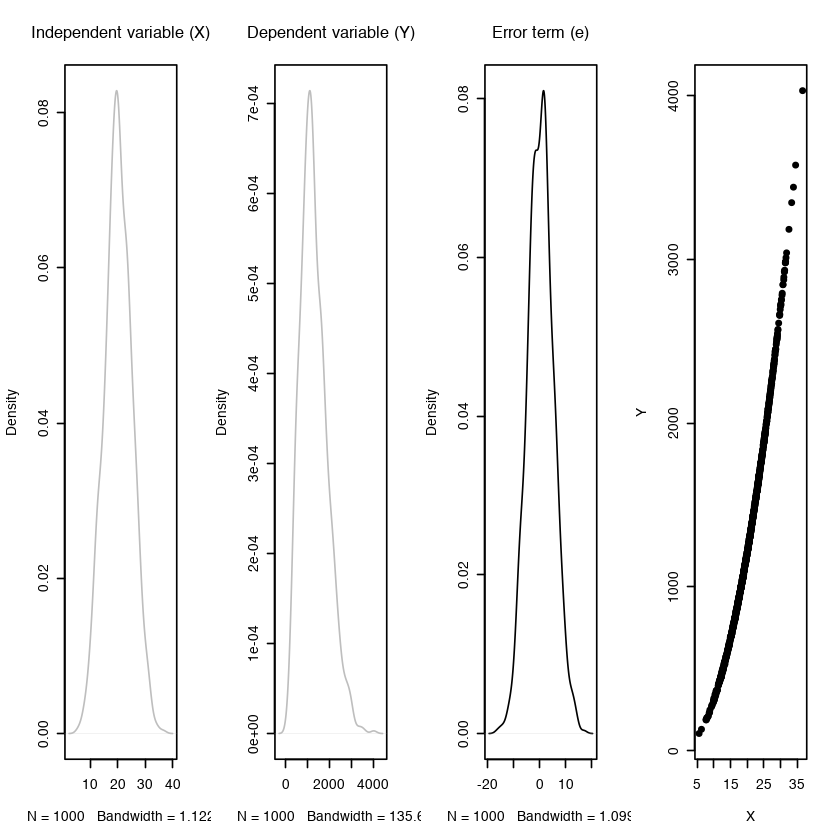

In [5]:
n <- 1000
B1 <- 10
B2 <- 3
X <- rnorm(n,20,5)
e <- rnorm(n,0,5)

Y = B1 + (B2*(X^2)) + e

par(mfrow=c(1,4))
plot(density(X),col="grey", main="Independent variable (X)")
plot(density(Y),col="grey", main="Dependent variable (Y)")
plot(density(e),main="Error term (e)")
plot(X,Y,pch=16,col="black")

In [6]:
example <- data.frame(Y,X)

nonlinearMod <- lm(Y ~ I(X^2), data=example)
print(nonlinearMod)

summary(nonlinearMod)



Call:
lm(formula = Y ~ I(X^2), data = example)

Coefficients:
(Intercept)       I(X^2)  
      10.12         3.00  




Call:
lm(formula = Y ~ I(X^2), data = example)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4647  -3.3160   0.0992   3.1910  16.5447 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.123923   0.365285   27.71   <2e-16 ***
I(X^2)       3.000341   0.000772 3886.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.953 on 998 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.51e+07 on 1 and 998 DF,  p-value: < 2.2e-16


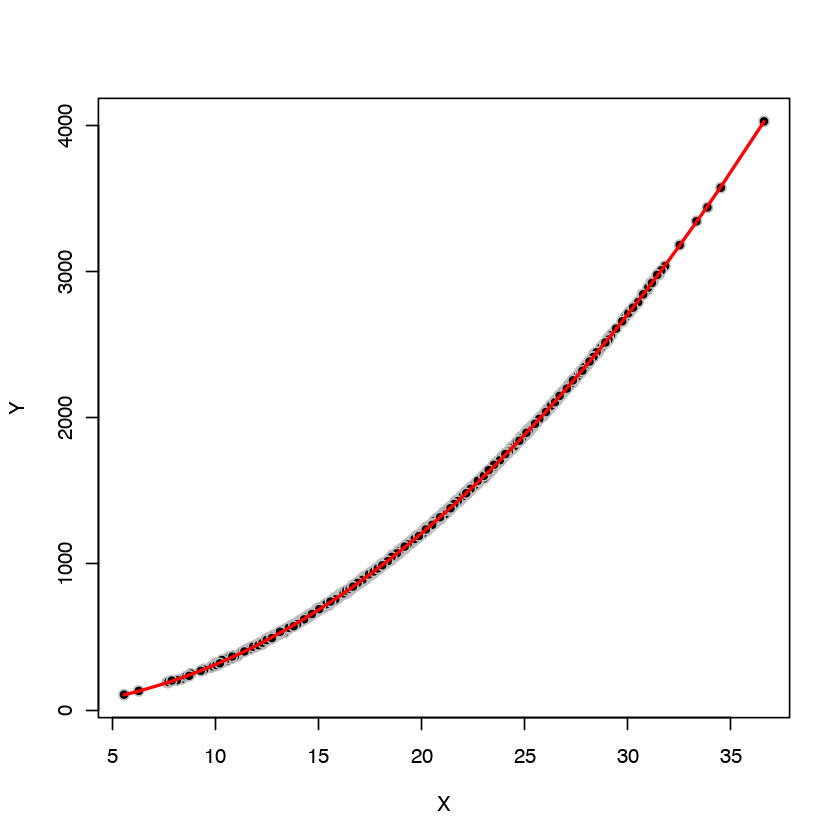

In [7]:
plot(X,Y,pch=21,col="grey",bg="black")
lines(sort(X), fitted(nonlinearMod)[order(X)], col='red', type='l',lwd=2) 

You can see that if we try to fit a linear model to the data it does not fit as well:

In [8]:
example <- data.frame(Y,X)

linearMod <- lm(Y ~ X, data=example)
print(linearMod)

summary(linearMod)


Call:
lm(formula = Y ~ X, data = example)

Coefficients:
(Intercept)            X  
    -1132.1        120.8  




Call:
lm(formula = Y ~ X, data = example)

Residuals:
   Min     1Q Median     3Q    Max 
-86.88 -65.86 -40.74  28.61 741.21 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1132.1034    13.2131  -85.68   <2e-16 ***
X             120.8205     0.6391  189.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.4 on 998 degrees of freedom
Multiple R-squared:  0.9728,	Adjusted R-squared:  0.9728 
F-statistic: 3.574e+04 on 1 and 998 DF,  p-value: < 2.2e-16


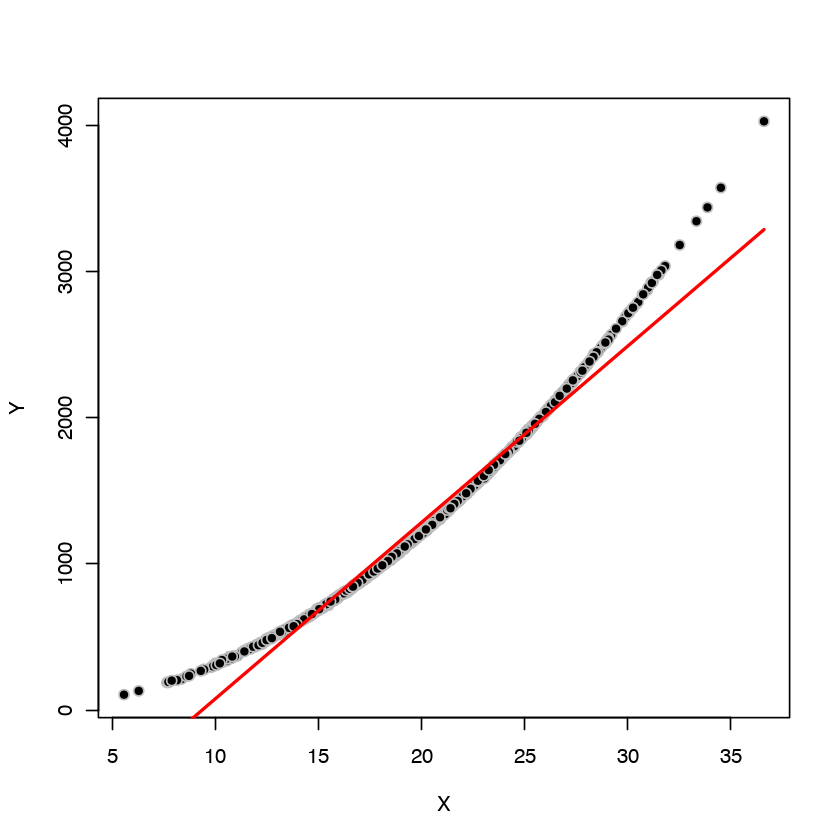

In [9]:
plot(X,Y,pch=21,col="grey",bg="black")
lines(sort(X), fitted(linearMod)[order(X)], col='red', type='l',lwd=2) 